![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_covid_19.ipynb)



# Training a Sentiment Analysis Classifier with NLU 
## 2 Class COVID-19 Sentiment Classifer Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


You can achieve these results or even better on this dataset with training data:


<br>

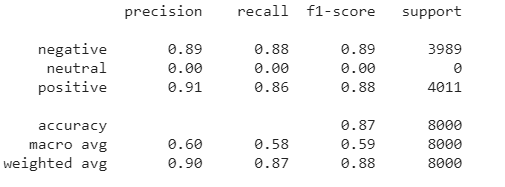


You can achieve these results or even better on this dataset with training data:


<br>

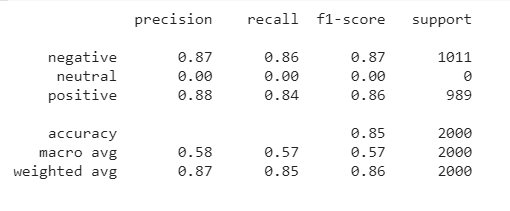

# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
import nlu

--2021-05-05 04:27:36--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-05 04:27:36 (35.7 MB/s) - written to stdout [1671/1671]

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
     |████████████████████████████████| 204.8MB 64kB/s 
     |████████████████████████████████| 153kB 46.6MB/s 
     |████████████████████████████████| 204kB 24.2MB/s 
     |████████████████████████████████| 204kB 59.8MB/s 


# 2. Download Coivd19 NLP Text Sentiemnt Classifcation    dataset 
https://www.kaggle.com/datatattle/covid-19-nlp-text-classification
#Context

This is a Dataset made of tweets about coivid 19 

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/Corona_NLP_train.csv

--2021-05-05 04:29:23--  http://ckl-it.de/wp-content/uploads/2021/02/Corona_NLP_train.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5293639 (5.0M) [text/csv]
Saving to: ‘Corona_NLP_train.csv’

Corona_NLP_train.cs 100%[===================>]   5.05M  4.58MB/s    in 1.1s    

2021-05-05 04:29:25 (4.58 MB/s) - ‘Corona_NLP_train.csv’ saved [5293639/5293639]



In [ ]:
import pandas as pd
train_path = '/content/Corona_NLP_train.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
4204,When I was a kid I always wanted to go on the ...,positive
5622,The selfish morons who panic bought toilet rol...,negative
6545,Profitero studied keyword search patterns and ...,positive
9049,"From listed funds to builders to landlords, @k...",negative
8568,"Against the back drop of NHS workers, civil se...",positive
...,...,...
9513,Crude prices could go negative while Alberta's...,negative
5209,Thank you so much to all of the amazing Health...,positive
8606,Crime in the COVID 19 era says a man s charged...,negative
3066,I need a sugar daddy fast! Cause this covid-19...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
from sklearn.metrics import classification_report

# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trainable_sentiment_dl']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        19
     neutral       0.00      0.00      0.00         0
    positive       0.65      1.00      0.78        31

    accuracy                           0.62        50
   macro avg       0.22      0.33      0.26        50
weighted avg       0.40      0.62      0.49        50



,sentence_embedding_use,text,y,origin_index,document,trained_sentiment_confidence,sentence,trained_sentiment
0,"[-0.07024706155061722, -0.047160204499959946, ...",When I was a kid I always wanted to go on the ...,positive,4204,When I was a kid I always wanted to go on the ...,0.782395,[When I was a kid I always wanted to go on the...,positive
1,"[-0.012395520694553852, -0.020829271525144577,...",The selfish morons who panic bought toilet rol...,negative,5622,The selfish morons who panic bought toilet rol...,0.628907,[The selfish morons who panic bought toilet ro...,positive
2,"[-0.02502020262181759, -0.08026497811079025, 0...",Profitero studied keyword search patterns and ...,positive,6545,Profitero studied keyword search patterns and ...,0.716436,[Profitero studied keyword search patterns and...,positive
3,"[0.06621277332305908, 0.011142794042825699, -0...","From listed funds to builders to landlords, @k...",negative,9049,"From listed funds to builders to landlords, @k...",0.613169,"[From listed funds to builders to landlords, @...",positive
4,"[-0.024583933874964714, 0.06747899204492569, 0...","Against the back drop of NHS workers, civil se...",positive,8568,"Against the back drop of NHS workers, civil se...",0.753840,"[Against the back drop of NHS workers, civil s...",positive
5,"[-0.030639173462986946, 0.07562850415706635, -...","""Your going to lose people to the flu but you'...",negative,1645,"""Your going to lose people to the flu but you'...",0.642136,"[""Your going to lose people to the flu but you...",positive
6,"[0.020836224779486656, -0.06270623952150345, -...",As the COVID 19 outbreak continues to spread f...,negative,4190,As the COVID 19 outbreak continues to spread f...,0.636920,[As the COVID 19 outbreak continues to spread ...,positive
7,"[0.04782669618725777, -0.0003077308356296271, ...",We re tracking daily changes in economic uncer...,negative,1930,We re tracking daily changes in economic uncer...,0.618729,[We re tracking daily changes in economic unce...,positive
8,"[-0.04952622205018997, -0.024686245247721672, ...",I'm slightly confused! All for social distanc...,positive,4717,I'm slightly confused! All for social distanci...,0.748444,"[I'm slightly confused!, All for social distan...",positive
9,"[0.015434695407748222, -0.0009663645178079605,...",TheÂ knock-on effects of COVID-19 are having a...,positive,3860,TheÂ knock-on effects of COVID-19 are having a...,0.778461,[TheÂ knock-on effects of COVID-19 are having ...,positive


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict("Everything is under control !")

,sentence_embedding_use,origin_index,document,trained_sentiment_confidence,sentence,trained_sentiment
0,"[0.027917474508285522, -0.06684374064207077, -...",0,Everything is under control !,0.770841,[Everything is under control !],positive


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(1)                 | Info: Maximum number of epochs to train | Currently set to : 1
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

##6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe = nlu.load('train.sentiment')
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        19
     neutral       0.00      0.00      0.00         0
    positive       0.97      1.00      0.98        31

    accuracy                           0.62        50
   macro avg       0.32      0.33      0.33        50
weighted avg       0.60      0.62      0.61        50



,sentence_embedding_use,text,y,origin_index,document,trained_sentiment_confidence,sentence,trained_sentiment
0,"[-0.07024706155061722, -0.047160204499959946, ...",When I was a kid I always wanted to go on the ...,positive,4204,When I was a kid I always wanted to go on the ...,0.978457,[When I was a kid I always wanted to go on the...,positive
1,"[-0.012395520694553852, -0.020829271525144577,...",The selfish morons who panic bought toilet rol...,negative,5622,The selfish morons who panic bought toilet rol...,0.530837,[The selfish morons who panic bought toilet ro...,neutral
2,"[-0.02502020262181759, -0.08026497811079025, 0...",Profitero studied keyword search patterns and ...,positive,6545,Profitero studied keyword search patterns and ...,0.845908,[Profitero studied keyword search patterns and...,positive
3,"[0.06621277332305908, 0.011142794042825699, -0...","From listed funds to builders to landlords, @k...",negative,9049,"From listed funds to builders to landlords, @k...",0.541567,"[From listed funds to builders to landlords, @...",neutral
4,"[-0.024583933874964714, 0.06747899204492569, 0...","Against the back drop of NHS workers, civil se...",positive,8568,"Against the back drop of NHS workers, civil se...",0.961466,"[Against the back drop of NHS workers, civil s...",positive
5,"[-0.030639173462986946, 0.07562850415706635, -...","""Your going to lose people to the flu but you'...",negative,1645,"""Your going to lose people to the flu but you'...",0.508357,"[""Your going to lose people to the flu but you...",neutral
6,"[0.020836224779486656, -0.06270623952150345, -...",As the COVID 19 outbreak continues to spread f...,negative,4190,As the COVID 19 outbreak continues to spread f...,0.526309,[As the COVID 19 outbreak continues to spread ...,neutral
7,"[0.04782669618725777, -0.0003077308356296271, ...",We re tracking daily changes in economic uncer...,negative,1930,We re tracking daily changes in economic uncer...,0.542942,[We re tracking daily changes in economic unce...,neutral
8,"[-0.04952622205018997, -0.024686245247721672, ...",I'm slightly confused! All for social distanc...,positive,4717,I'm slightly confused! All for social distanci...,0.953167,"[I'm slightly confused!, All for social distan...",positive
9,"[0.015434695407748222, -0.0009663645178079605,...",TheÂ knock-on effects of COVID-19 are having a...,positive,3860,TheÂ knock-on effects of COVID-19 are having a...,0.974030,[TheÂ knock-on effects of COVID-19 are having ...,positive


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(120)  
trainable_pipe['trainable_sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.89      0.86      0.87      3982
     neutral       0.00      0.00      0.00         0
    positive       0.90      0.85      0.87      4018

    accuracy                           0.85      8000
   macro avg       0.60      0.57      0.58      8000
weighted avg       0.90      0.85      0.87      8000



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.88      0.81      0.85      1018
     neutral       0.00      0.00      0.00         0
    positive       0.86      0.85      0.85       982

    accuracy                           0.83      2000
   macro avg       0.58      0.55      0.57      2000
weighted avg       0.87      0.83      0.85      2000



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('Everything is under control !')
preds

,text,sentiment,origin_index,document,sentiment_confidence,sentence_embedding_from_disk,sentence
0,Everything is under control !,[negative],8589934592,Everything is under control !,[0.7562715],"[[0.3778035342693329, 0.29955393075942993, 0.1...",[Everything is under control !]


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.anno